In [62]:
] activate .

In [63]:
using Revise
includet("isokann.jl")

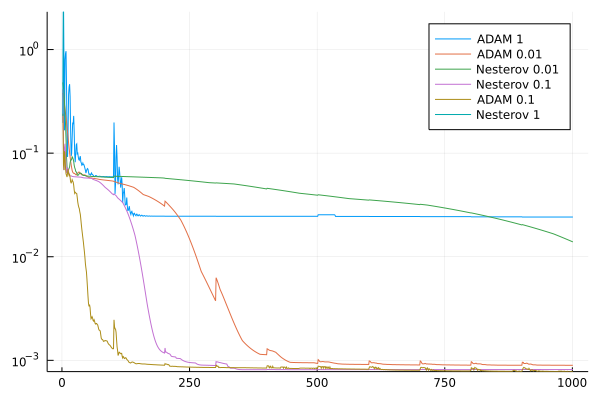

 33.610712 seconds (113.40 M allocations: 19.706 GiB, 8.49% gc time)


(0.0005735653139514932, 0.0004900750541217633)

In [64]:
# for i in poweriter:
#   chi = model
#   for j in iter:  # SGD
#      model <- SE_y~P(x)[chi]         # SE = Shiftscale of Expectation

@time res = compareopt(alg=isokann, iter=100, poweriter=10)

models = map(x->x[1], res["ADAM 0.1"])

fixedpointloss.(models) |> mean_and_std

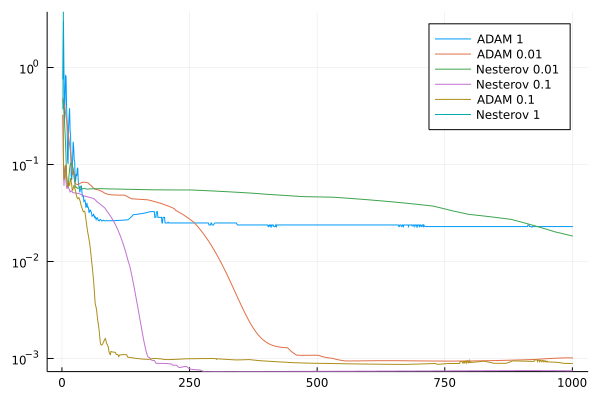

 35.491032 seconds (116.49 M allocations: 19.936 GiB, 8.23% gc time)


(0.0005796544789584935, 0.00040073962045098594)

In [65]:
# for i in poweriter:
#      model <- SE[model]
@time res = compareopt(alg=isokann, iter=1, poweriter=1000)

models = map(x->x[1], res["ADAM 0.1"])

fixedpointloss.(models) |>  mean_and_std

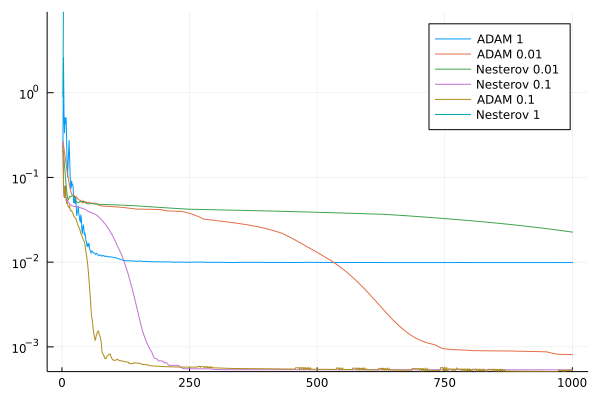

175.567136 seconds (944.13 M allocations: 80.087 GiB, 8.61% gc time)


(0.0013475727125911963, 0.002754473553100781)

In [66]:
#  SE[model] - model -> 0
@time res = compareopt(alg=fpnn, iter=1000)

models = map(x->x[1], res["ADAM 0.1"])

fixedpointloss.(models) |> mean_and_std

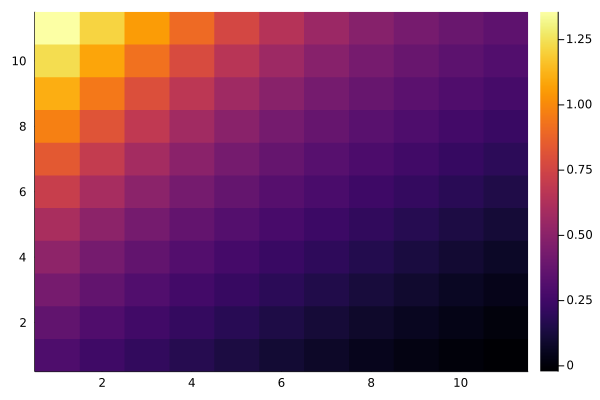

In [67]:
heatmap(models[1])